# Coding Section 2
## Econ 130
GSIs: Alice Schmitz and Ale Marchetti-Bowick

### Goals for today
* Do some data analysis, building up to a diff-in-diff
* We will start with what we did in the previous section, but we will not assume any knowledge other than what we covered.


Often times, user written open-source packages are needed for specific functionality in R (e.g. nice graphics). However, we need to manually install these packages (once) and load them at the beginning of every script. Packages have been pre-installed in Jupyter notebooks.  

*If you are wondering why a command you've used before is no longer working, it may be because you haven't loaded the package.*

In [17]:
# Clear any existing output and data stored in memory
rm(list = ls())

# Read in the data that we constructed last time
mw_no_shore <- read.csv('minwage_no_shore.csv')

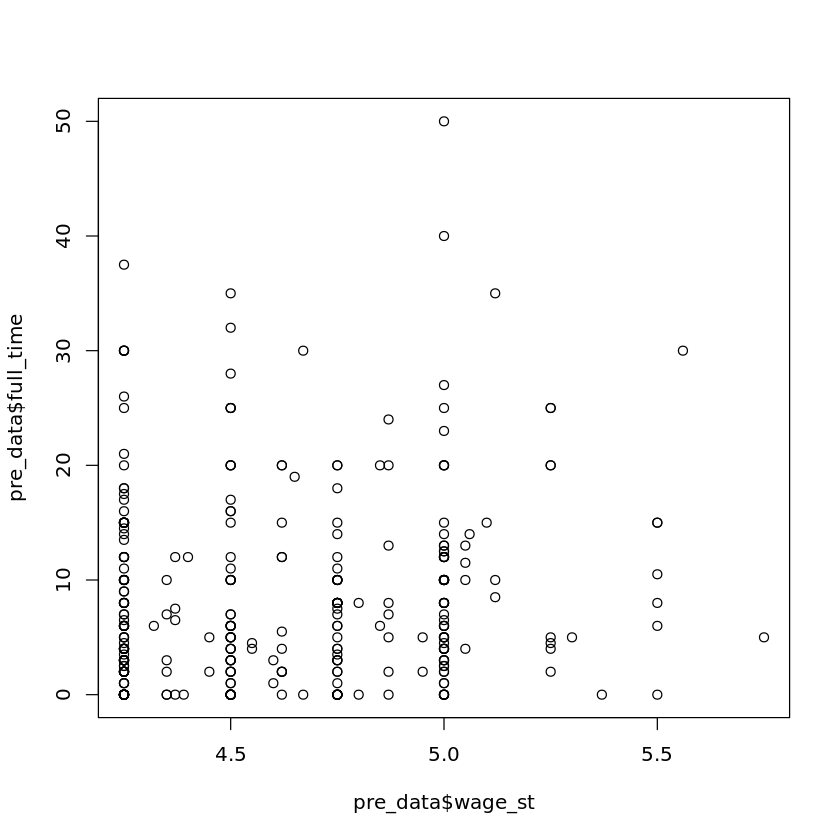

In [31]:
# First, let's try to visualize the relationship between employment (full_time)
# and wages (wage_st, the starting wage). We'll focus on the relationship
# in period 1

# First, we'll try a scatterplot
pre_data <- mw_no_shore[which(mw_no_shore$interview==1),]
plot(pre_data$wage_st,pre_data$full_time)

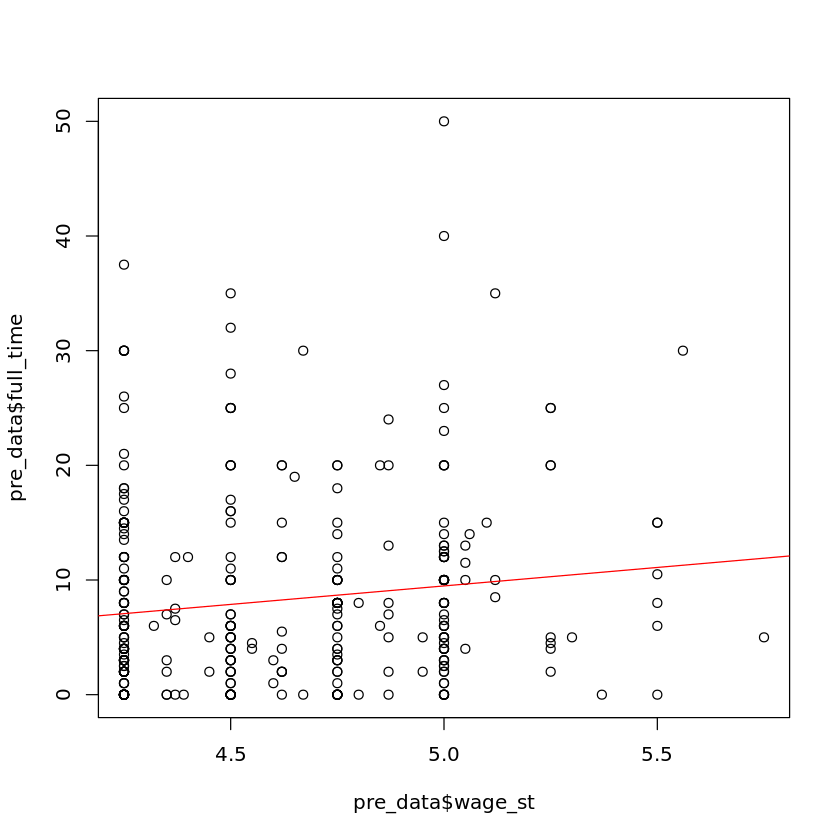

In [32]:
#It's hard to interpret! Let's add a line of best fit
plot(pre_data$wage_st,pre_data$full_time)
abline(lm(full_time~wage_st, data=pre_data), col="red")

# Note that it's plot(x,y) but linear model lm(y,x)!

## Correlations

In [35]:
# What is the correlation between full-time and part-time employees, and wages? How do we read this table?
# Note: the user = "complete.obs" is necessary in order to tell R to ignore missing data. Otherwise it will
# return a lot of NA's (you can try it if you want!).

cor(mw_no_shore[, c('full_time','part_time','wage_st')], use = "complete.obs")

,full_time,part_time,wage_st
full_time,1.0000000,-0.23052929,0.10826387
part_time,-0.2305293,1.00000000,-0.05993233
wage_st,0.1082639,-0.05993233,1.00000000


In [21]:
# Recall (from lecture) that the correlation coefficient is not the same as the regression 
# coefficient, although they are related. (If you've taken ECON 140/141, you'll know why. 
# If not, don't worry about it!) For example,

m<-lm(mw_no_shore$full_time~mw_no_shore$part_time)

summary(m)


Call:
lm(formula = mw_no_shore$full_time ~ mw_no_shore$part_time)

Residuals:
    Min      1Q  Median      3Q     Max 
-11.435  -5.908  -1.902   3.745  44.462 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)           11.43547    0.61430   18.62  < 2e-16 ***
mw_no_shore$part_time -0.16850    0.02837   -5.94 4.41e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.926 on 730 degrees of freedom
  (18 observations deleted due to missingness)
Multiple R-squared:  0.04611,	Adjusted R-squared:  0.0448 
F-statistic: 35.29 on 1 and 730 DF,  p-value: 4.405e-09


## Diff-in-Diff Table

For a diff-in-diff, we need to calculate four means: two "pre" means (one each for NJ and for PA) and two "post" means for full-time employment.

Let's make things more intuitive by generating some new variables "treated" and "post."

In [36]:
# Treated = 1 if NJ = 1 and 0 otherwise
mw_no_shore$treated <- 0
mw_no_shore$treated[mw_no_shore$nj == 1] <- 1 

# Post = 1 if interview = 2 and 0 otherwise
mw_no_shore$post <- 0
mw_no_shore$post[mw_no_shore$interview == 2] <- 1

# We'll use the print command to help us organize our output

print("Pre; NJ then PA")
mean(mw_no_shore$full_time[mw_no_shore$nj == 1 & mw_no_shore$post == 0], na.rm = TRUE)
mean(mw_no_shore$full_time[mw_no_shore$nj == 0 & mw_no_shore$post == 0], na.rm = TRUE)

print("Post; NJ then PA")
mean(mw_no_shore$full_time[mw_no_shore$nj == 1 & mw_no_shore$post == 1], na.rm = TRUE)
mean(mw_no_shore$full_time[mw_no_shore$nj == 0 & mw_no_shore$post == 1], na.rm = TRUE)

[1] "Pre; NJ then PA"


[1] 7.589347

[1] 10.20513

[1] "Post; NJ then PA"


[1] 8.54007

[1] 7.564935

Now we can complete the table that we started last week:

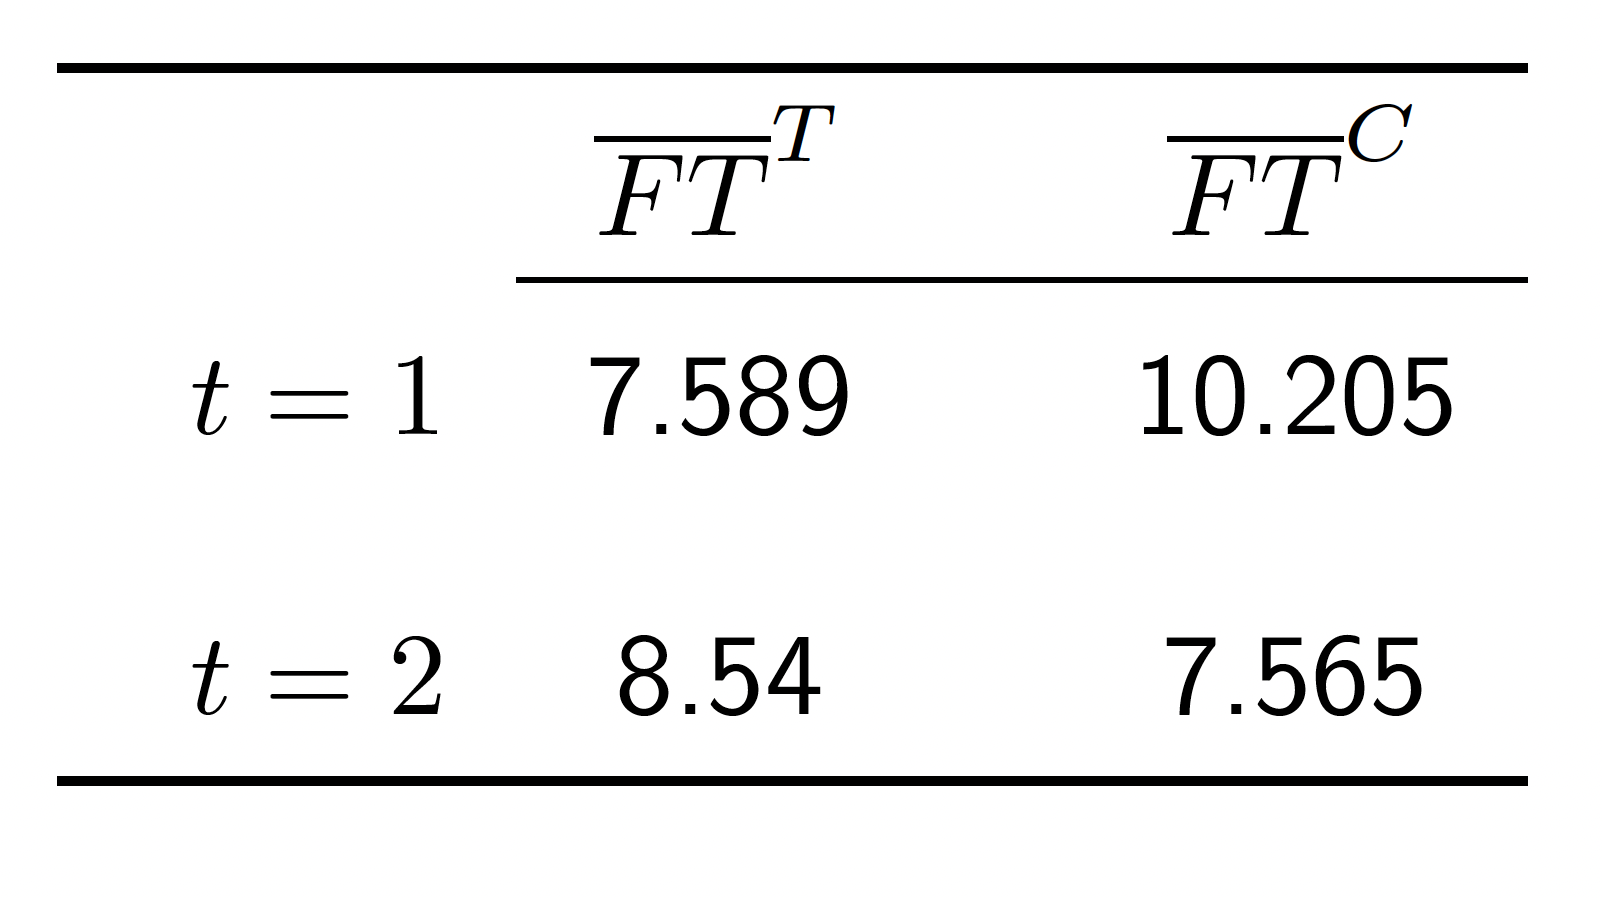

## Diff-in-Diff Regression

In [23]:
# Now let's see how we can get the differences with regressions

# Here's a naive regression: a single difference (NJ pre vs. NJ post)
nj_single <- lm(full_time ~ post, data = mw_no_shore[which(mw_no_shore$nj==1),])
summary(nj_single)

# Which difference in means does this correspond to? Is it causal?


Call:
lm(formula = full_time ~ post, data = mw_no_shore[which(mw_no_shore$nj == 
    1), ])

Residuals:
   Min     1Q Median     3Q    Max 
-8.540 -5.589 -2.315  4.411 31.460 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   7.5893     0.4452  17.048   <2e-16 ***
post          0.9507     0.6317   1.505    0.133    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.594 on 576 degrees of freedom
  (14 observations deleted due to missingness)
Multiple R-squared:  0.003916,	Adjusted R-squared:  0.002187 
F-statistic: 2.265 on 1 and 576 DF,  p-value: 0.1329


In [24]:
# What about this version?
post_single <- lm(full_time ~ treated, data = mw_no_shore[which(mw_no_shore$post==1),])
summary(post_single)


Call:
lm(formula = full_time ~ treated, data = mw_no_shore[which(mw_no_shore$post == 
    1), ])

Residuals:
   Min     1Q Median     3Q    Max 
 -8.54  -6.54  -2.54   3.46  31.46 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   7.5649     0.9079   8.332 1.66e-15 ***
treated       0.9751     1.0225   0.954    0.341    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.967 on 362 degrees of freedom
  (11 observations deleted due to missingness)
Multiple R-squared:  0.002506,	Adjusted R-squared:  -0.0002492 
F-statistic: 0.9095 on 1 and 362 DF,  p-value: 0.3409


In [25]:
# Now let's do the diff-in-diff

mw_no_shore$treatedxpost <- mw_no_shore$treated * mw_no_shore$post

diff_in_diff <- lm(full_time ~ treated + post + treatedxpost, data = mw_no_shore)
summary(diff_in_diff)

# Does this look like your table? What is the advantage of doing things this way
# vs. in a table? Are there disadvantages?


Call:
lm(formula = full_time ~ treated + post + treatedxpost, data = mw_no_shore)

Residuals:
    Min      1Q  Median      3Q     Max 
-10.205  -6.540  -2.540   3.911  39.795 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   10.2051     0.9153  11.149   <2e-16 ***
treated       -2.6158     1.0307  -2.538   0.0114 *  
post          -2.6402     1.2986  -2.033   0.0424 *  
treatedxpost   3.5909     1.4624   2.455   0.0143 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.084 on 729 degrees of freedom
  (17 observations deleted due to missingness)
Multiple R-squared:  0.01009,	Adjusted R-squared:  0.006011 
F-statistic: 2.476 on 3 and 729 DF,  p-value: 0.06033


In [26]:
# How do we feel about this specification?
# Is there anything else you want to control for? Do we have these variables?

# I want to control for chain. Here's a nice way to do it without manually generating
# a lot of variables:

w_chain <- lm(full_time ~ treated + post + treatedxpost + factor(chain), data = mw_no_shore)
summary(w_chain)

# This set of indicator variables for chain are often referred to as "factor variables," which is
# where the R command gets it's name. I figured out how to do this by Googling "R ols factor variables"
# and reading what was the first result for me (from the UCLA stats department)


Call:
lm(formula = full_time ~ treated + post + treatedxpost + factor(chain), 
    data = mw_no_shore)

Residuals:
    Min      1Q  Median      3Q     Max 
-11.785  -5.221  -1.624   3.779  38.215 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)     11.7845     0.9524  12.373  < 2e-16 ***
treated         -2.3856     1.0056  -2.372  0.01794 *  
post            -2.6602     1.2645  -2.104  0.03574 *  
treatedxpost     3.6080     1.4239   2.534  0.01149 *  
factor(chain)2  -5.2297     0.8026  -6.516 1.35e-10 ***
factor(chain)3  -2.1780     0.7346  -2.965  0.00313 ** 
factor(chain)4  -1.5606     0.9030  -1.728  0.08436 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.87 on 726 degrees of freedom
  (17 observations deleted due to missingness)
Multiple R-squared:  0.0656,	Adjusted R-squared:  0.05788 
F-statistic: 8.495 on 6 and 726 DF,  p-value: 6.219e-09


In [27]:
# What other outcome variables are you interested in that might be related
# to economic hypotheses about raising the minimum wage? Do we have data to test this?